<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The National Basketball Association publish information about their end of season awards on their website (https://www.basketball-reference.com/awards/awards_2021.html)

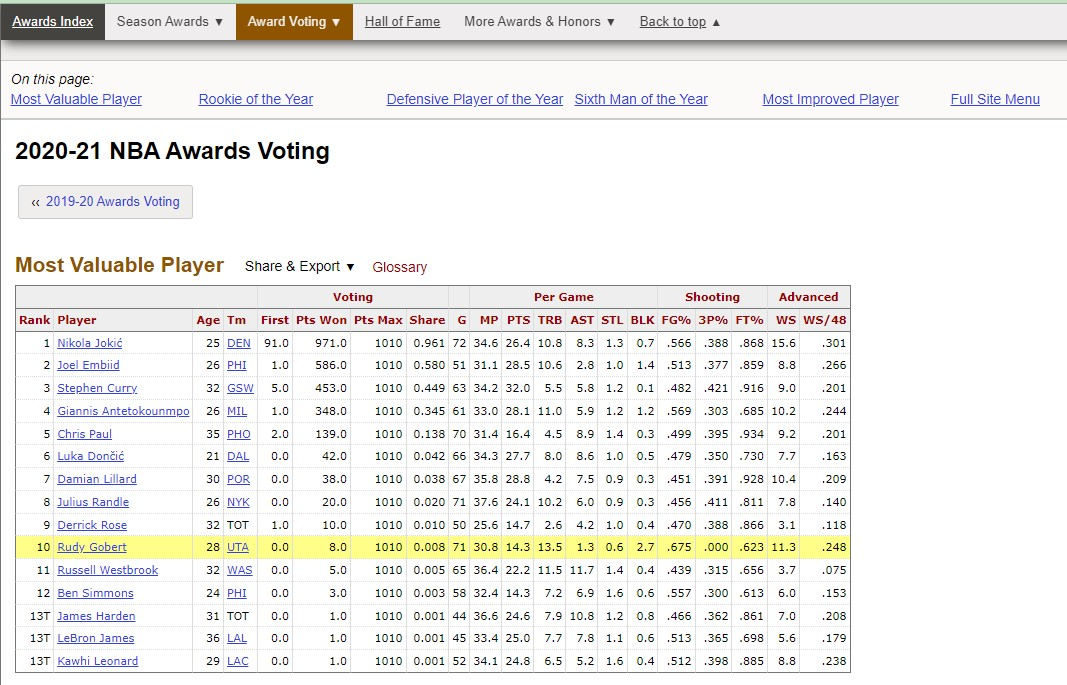

We might use these tables to help predict the Most Valued Player in the National Basketball Association league for 2022.  We would start this process by scraping the data from their website.  

## For reference:
---


This is the code used to scrape the tables from the website, using Colabs, and saving them in .csv files, downloaded to the local device.  They have been uploaded to Github so that you don't need to get them again.  The code below is included for reference.  Note:  Google seems to have a limit on the number of files it can deal with for download at once. This may need to be run in three lots (1991 to 2000, 2001 to 2010, 2011 t0 2020, 2021)
```
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

def get_data():
  years = list(range(1991, 2021))
  url = "https://www.basketball-reference.com/awards/awards_{}.html"
  for year in years:
    year_url = url.format(year)
    data = requests.get(year_url)
    soup = BeautifulSoup(data.text, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_year = pd.read_html(str(mvp_table))[0]
    filename = "mvp_{}.csv"
    mvp_year.to_csv(filename.format(year))
    files.download(filename.format(year))
  return mvp_year

table_data = get_data()
```





##Data sources:
---


The downloaded files were then uploaded to Github and are stored in this folder: https://github.com/futureCodersSE/python-programming-for-data/tree/main/Datasets/NBA-MVP.  Links to individual files are in this format:  https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_1991.csv with the year replaced for each file.

## Activity
---

Read the datasets (there are 11 dataset files - 1991 to 2021 - how can you use a loop to do this?)

Investigate the contents of the resulting dataframes.  

Can they be sensibly merged?  What do you observe?

Does sorting revealt any trends?

Is there a trend in performance?



# Trying to get the first table data out of the NBA website.

---



In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_data():
  url = "https://www.basketball-reference.com/awards/awards_1991.html"
  data = requests.get(url)
  soup = BeautifulSoup(data.text, "html.parser")
  soup.find('tr', class_="over_header").decompose()
  mvp_table = soup.find(id="mvp")
  #print(mvp_table)
  mvp_1991 = pd.read_html(str(mvp_table))[0]  #TypeError: 'str' object is not callable !!!
 
  return mvp_1991

mvp_1991 = get_data()

I created a concatenated dataframe from each of the years' raw csv data.

In [3]:
#Now create each df from each year or mvp stats and concatenate them together

results_df = mvp_1991
results_df["Year"] = 1991 #add year column to the df

for year in range(1992,2022):
  url = f'https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_{year}.csv'
  
  df = pd.read_csv(url, lineterminator='\n', error_bad_lines=False) #removes any bad rows that may have extra \n (returns) or ',' at the end of the row
  df["Year"] = year  #add year column to the df
  results_df = pd.concat([results_df, df], join='inner', ignore_index=True)  #concatenates the latest df to results_df
  result_df = results_df

results_df



,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [4]:
results_df.to_csv("mvp_stats.csv") #saved the results dataframe locally so it can be used again without the need for scraping.

In [5]:

results_df.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

In [6]:
sorted_df = results_df.sort_values(by = ["G", "WS/48"], ascending = False) # sort the df by chosen column(s)
sorted_df.head(10)




,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
83,1,Michael Jordan,32,CHI,109.0,1114.0,1130,0.986,82,37.7,30.4,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317,1996
84,2,David Robinson,30,SAS,0.0,574.0,1130,0.508,82,36.8,25.0,12.2,3.0,1.4,3.3,0.516,0.333,0.761,18.3,0.290,1996
101,2,Michael Jordan,33,CHI,52.0,957.0,1150,0.832,82,37.9,29.6,5.9,4.3,1.7,0.5,0.486,0.374,0.833,18.3,0.283,1997
224,1,Kevin Garnett,27,MIN,120.0,1219.0,1230,0.991,82,39.4,24.2,13.9,5.0,1.5,2.2,0.499,0.256,0.791,18.3,0.272,2004
394,6,Chris Paul,29,LAC,0.0,124.0,1300,0.095,82,34.8,19.1,4.6,10.2,1.9,0.2,0.485,0.398,0.900,16.1,0.270,2015
100,1,Karl Malone,33,UTA,63.0,986.0,1150,0.857,82,36.6,27.4,9.9,4.5,1.4,0.6,0.550,0.000,0.755,16.7,0.268,1997
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
193,1,Tim Duncan,25,SAS,57.0,954.0,1260,0.757,82,40.6,25.5,12.7,3.7,0.7,2.5,0.508,0.100,0.799,17.8,0.257,2002
163,4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,25.5,9.5,3.7,1.0,0.9,0.509,0.250,0.797,15.3,0.249,2000


**First impressions**


---

Sorted by First votes received = Best player of the 30 year range looks to be Stephen Curry in 2016 at the age of 27. He received the highest number of First votes for player of the year.
However, if you sort by Points per game then James Harden scored highest in 2019. Followed by Kobe Bryant (RIP) with 35.4 average in 2006. These players actually scored more than Stephen Curry per game. Sorting by number of games then by points per game you can see that the most consistent player is Micheal Jordan who over 82 games had a points per game average of 31.5.



In [9]:
#copy results_df into a new df called mvp_minimal so I can strip a lot of the columns out
mvp_minimal = results_df
mvp_minimal = mvp_minimal.drop(['Rank', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 
       'G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS'], axis=1)

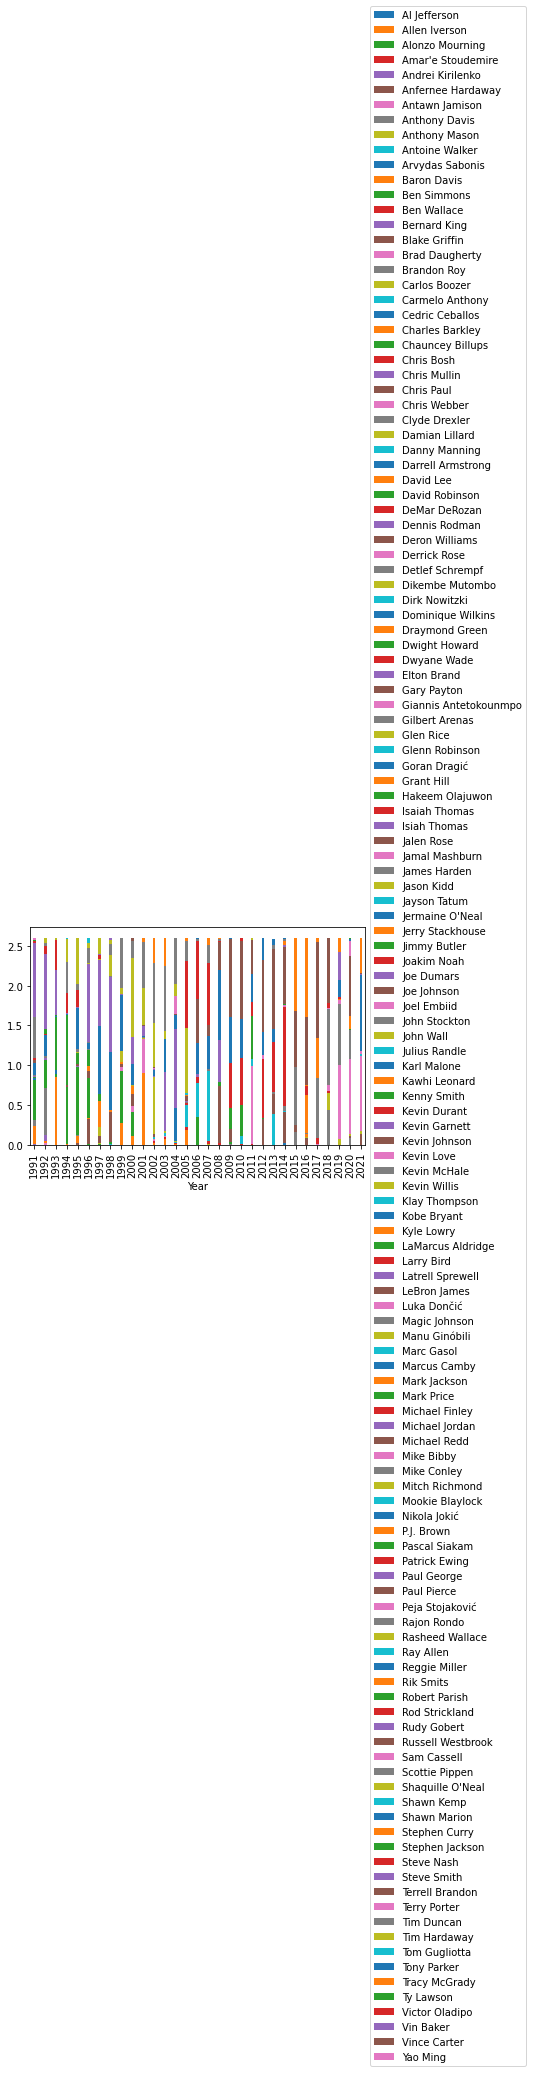

In [10]:
#Jay's code

#  import matplotlib  
#  import matplotlib.pyplot as plt
#  MVP_v3_sort = MVP_df_v3.sort_values(by=['Share'])
#  #MVP_v2_sort["share_gauge"] = MVP_v2_sort["Share"]*MVP_v2_sort["WS/48"]
#  MVP_sort_WS = MVP_v3_sort.pivot(index="Year", columns="Player", values = "Share") 
#  MVP_sort_WS.plot(kind='bar', stacked=True, width=0.25, align='center')
#  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#  plt.show()


import matplotlib  
import matplotlib.pyplot as plt


#trying to follow Jay's example and plt the share of votes against WS/48
mvp_minimal = mvp_minimal.sort_values(by=['Share'])
mvp_pivot_table = mvp_minimal.pivot(index="Year", columns="Player", values = "Share") 
mvp_pivot_table.plot(kind='bar', stacked=True, width=0.25, align='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#not sure what this table is showing me


In [27]:
#Linear regression to see if there is a correlation between the voting and the actual points scored.
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(results_df['WS/48']).reshape((-1, 1))
y = np.array(results_df['Share'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('slope:', model.coef_)
print('intercept:', model.intercept_)
r_sq

coefficient of determination: 0.3490457355505512
slope: [3.39741379]
intercept: -0.49411468707159434


0.3490457355505512

Using 'Share' as the dependant value and "WS/48' as the independant value I get a R^2 value = 0.349.... showing that the Win Shares per 48 minutes is related to share of votes received but not very strongly. But is still the strongest correlation of all the stats tested below:-

Minutes Played (MP) against Share showed little correlation (0.0246).  I checked all the Per Game stats and they were all very low r squared values. Except Games played against Share = 0.2315

Age against Share = 0.00077 even less correlation for obvious reasons

Shooting stats showed  almost no correlation against Share either.

So the most significant, although not the whole picture, stat realting to Most Valued Player for those who voted seems to be the WS/48 value.

Other factors could be things like personalities, social media, news stories good and bad etc. The voting seems subjective rather than based on stats. We also don't know who is involved in the voting system, they may have biases or ulterior motives for voting the way they did.




## Reference
---
**Video link**: https://www.youtube.com/watch?v=JGQGd-oa0l4 used as an initial inspiration and modified to allow use of Google Colab and slower progress towards predictions (video uses Jupyter notebooks and local files so code is different)

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: I had to do some internet searching for fixes to the problems that arose in this worksheet. Followed instructions from a youtube video to scrape the relevant data off the website and then had a Type Error that didn't make sense. Had to look back at some previous worksheets to remind myself how to do certain things like concat and sorting.

## What caused you the most difficulty?

Your answer: Trying to understand errors that didn't make sense. The Type Error corrected itself after I shut down my laptop. Infuriating. 